1. Tại sao cần dùng softmax activation ở layer cuối cùng?

Giống như bài logistic regression, thay vì chỉ muốn kết quả là ảnh là số mấy, ta muốn dự đoán phần
trăm của ảnh là số nào. Ví dụ: 90% ảnh là số 5, 1% ảnh là số 1,...
Nhắc lại bài neural network, ở mỗi layer sẽ thực hiện 2 bước: tính tổng linear các node ở layer trước
và thực hiện activation function (ví dụ sigmoid function, softmax function). Do sau bước tính tổng
linear cho ra các giá trị thực nên cần dùng softmax function dùng để chuyển đổi giá trị thực trong
các node ở output layer sang giá trị phần trăm.
Vì mỗi ảnh sẽ thuộc 1 class từ 0 đến 9, nên tất cả sẽ có 10 class. Nên output layer sẽ có 10
node để tương ứng với phần trăm ảnh là số 0,1,..,9. Ví dụ: a6 là xác suất ảnh là số 5. (Sự khác biệt
chỉ số do các số bắt đầu từ 0 trong khi chỉ số của node trong layer bắt đầu từ 1)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist

C:\Users\MAC\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000, :], y_train[50000:60000]
X_train, y_train = X_train[:50000, :], y_train[:50000]
print(X_train.shape)
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# 4. One hot encoding label (Y)
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)

Y_test = to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ', Y_train[0])

(50000, 28, 28)
Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [3]:
# 5. Định nghĩa model
model = Sequential()
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))

C:\Users\MAC\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
              batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 38ms/step - accuracy: 0.7966 - loss: 0.6988 - val_accuracy: 0.9804 - val_loss: 0.0741
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.9821 - loss: 0.0662 - val_accuracy: 0.9842 - val_loss: 0.0563
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.9892 - loss: 0.0385 - val_accuracy: 0.9884 - val_loss: 0.0415
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.9931 - loss: 0.0234 - val_accuracy: 0.9873 - val_loss: 0.0425
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.9964 - loss: 0.0155 - val_accuracy: 0.9869 - val_loss: 0.0416
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.9976 - loss: 0.0102 - val_accuracy: 0.9888 - val_loss: 0.0382
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.9982 - loss: 0.0070 - val_accuracy: 0.9884 - val_loss: 0.0392
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 39ms/step - accuracy: 0.9991 -

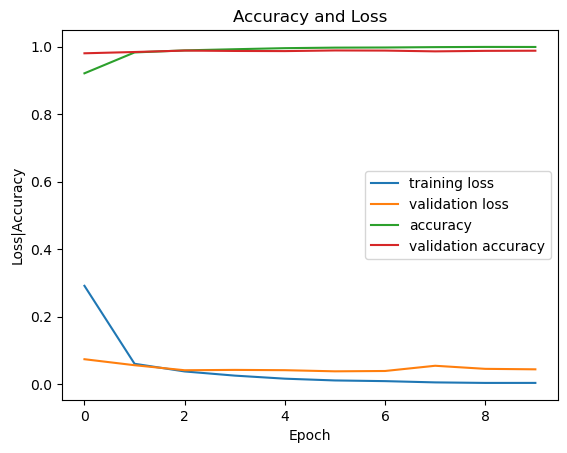

In [6]:
# 8. Vẽ đồ thị loss, accuracy của training set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [7]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.035347193479537964, 0.9901000261306763]


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

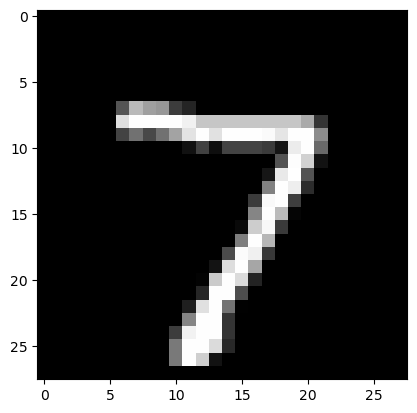

In [8]:
# 10. Dự đoán ảnh
print(X_test[0].reshape(28, 28))
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
y_predict = model.predict(X_test[0].reshape(1, 28, 28, 1))
print(y_predict)
print('Giá trị dự đoán: ', np.argmax(y_predict))